In [2]:
from keras.preprocessing import sequence
from keras.datasets import imdb
from keras.layers import *
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
def plot(history):
    epoch = range(1, len(history['acc']) + 1)
    plt.clf()
    plt.plot(epoch, history['acc'], 'bo', label='Training Acc')
    plt.plot(epoch, history['loss'], 'b', label='Training Loss')
    plt.plot(epoch, history['val_acc'], 'ro', label='Validation Acc')
    plt.plot(epoch, history['val_loss'], 'r', label='Validation Loss')
    plt.legend()
    plt.show()

In [4]:
max_features = 10000
max_len = 500
batch_size = 32

In [5]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [6]:
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [5]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation="sigmoid"))

In [6]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics=['acc']
)

In [7]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size = batch_size,
    validation_split= 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 103s 5ms/step - loss: 0.5446 - acc: 0.7054 - val_loss: 0.4366 - val_acc: 0.8156
Epoch 2/10
20000/20000 [==============================] - 100s 5ms/step - loss: 0.3544 - acc: 0.8537 - val_loss: 0.3519 - val_acc: 0.8638
Epoch 3/10
20000/20000 [==============================] - 103s 5ms/step - loss: 0.2988 - acc: 0.8833 - val_loss: 0.3684 - val_acc: 0.8356
Epoch 4/10
20000/20000 [==============================] - 102s 5ms/step - loss: 0.2604 - acc: 0.8987 - val_loss: 0.3525 - val_acc: 0.8506
Epoch 5/10
20000/20000 [==============================] - 100s 5ms/step - loss: 0.2331 - acc: 0.9099 - val_loss: 0.7140 - val_acc: 0.7598
Epoch 6/10
20000/20000 [==============================] - 100s 5ms/step - loss: 0.1853 - acc: 0.9313 - val_loss: 0.3827 - val_acc: 0.8574
Epoch 7/10
20000/20000 [==============================] - 96s 5ms/step - loss: 0.1659 - acc: 0.9372 - val_loss: 0.4255 - va

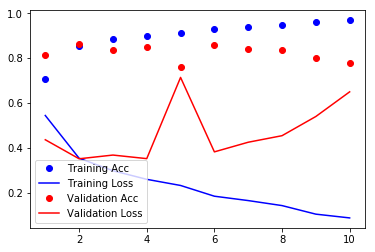

In [12]:
plot(history.history)

In [13]:
model.save('imdb_simpleRNN.h5')

In [7]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation="sigmoid"))

In [8]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics=['acc']
)

In [9]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size = batch_size,
    validation_split= 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 422s 21ms/step - loss: 0.4184 - acc: 0.8083 - val_loss: 0.3234 - val_acc: 0.8654
Epoch 2/10
20000/20000 [==============================] - 403s 20ms/step - loss: 0.2663 - acc: 0.8963 - val_loss: 0.2982 - val_acc: 0.8750
Epoch 3/10
20000/20000 [==============================] - 385s 19ms/step - loss: 0.2256 - acc: 0.9166 - val_loss: 0.2932 - val_acc: 0.8880
Epoch 4/10
20000/20000 [==============================] - 389s 19ms/step - loss: 0.1996 - acc: 0.9276 - val_loss: 0.2841 - val_acc: 0.8826
Epoch 5/10
20000/20000 [==============================] - 422s 21ms/step - loss: 0.1833 - acc: 0.9330 - val_loss: 0.2748 - val_acc: 0.8950
Epoch 6/10
20000/20000 [==============================] - 416s 21ms/step - loss: 0.1684 - acc: 0.9392 - val_loss: 0.2721 - val_acc: 0.8920
Epoch 7/10
20000/20000 [==============================] - 461s 23ms/step - loss: 0.1578 - acc: 0.9446 - val_loss: 0.3

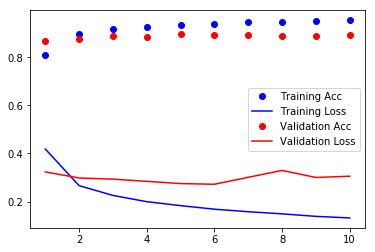

In [10]:
plot(history.history)